In [11]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=df5f8c178b377f3b91bdbc6977b322be205e5f1212e658ec545a64b0ee3f8cc8
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [13]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.datasets import load_files
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils import np_utils


ImportError: cannot import name 'np_utils' from 'keras.utils' (/opt/conda/lib/python3.10/site-packages/keras/utils/__init__.py)

In [27]:
import cv2
import pandas as pd

#  Sample image


# Training and testing data information

In [17]:
import os, os.path
train_categories = []
train_samples = []
for i in os.listdir("../input/fruits/fruits-360_dataset/fruits-360/Training/"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("../input/fruits/fruits-360_dataset/fruits-360/Training/"+ i)))

test_categories = []
test_samples = []
for i in os.listdir("../input/fruits/fruits-360_dataset/fruits-360/Test/"):
    test_categories.append(i)
    test_samples.append(len(os.listdir("../input/fruits/fruits-360_dataset/fruits-360/Test/"+ i)))

    
print("Count of Fruits in Training set:", sum(train_samples))
print("Count of Fruits in Set set:", sum(test_samples))

Count of Fruits in Training set: 67692
Count of Fruits in Set set: 22688


In [18]:
image_path="/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/"

In [21]:
class_names = os.listdir(image_path)
print(class_names)

['Quince', 'Grapefruit White', 'Granadilla', 'Orange', 'Apple Red 3', 'Grape White 2', 'Corn Husk', 'Tamarillo', 'Banana Red', 'Nectarine Flat', 'Pepper Yellow', 'Nut Forest', 'Pear Monster', 'Fig', 'Tomato Heart', 'Onion Red Peeled', 'Lemon Meyer', 'Onion Red', 'Passion Fruit', 'Cucumber Ripe', 'Cactus fruit', 'Tomato not Ripened', 'Mango Red', 'Apple Pink Lady', 'Pomegranate', 'Plum', 'Pineapple', 'Tomato 1', 'Cherry 2', 'Apple Red 2', 'Avocado ripe', 'Dates', 'Maracuja', 'Papaya', 'Nut Pecan', 'Pear Stone', 'Cherry Wax Yellow', 'Eggplant', 'Apple Golden 2', 'Guava', 'Beetroot', 'Tomato Maroon', 'Potato Red', 'Apple Red Delicious', 'Cherry Wax Red', 'Kiwi', 'Cherry Wax Black', 'Limes', 'Cantaloupe 2', 'Apple Braeburn', 'Pear', 'Carambula', 'Tomato 3', 'Onion White', 'Cherry 1', 'Strawberry', 'Lychee', 'Redcurrant', 'Rambutan', 'Potato Red Washed', 'Tomato 4', 'Hazelnut', 'Tomato Yellow', 'Plum 3', 'Grape White', 'Pineapple Mini', 'Mulberry', 'Grape Blue', 'Pear Abate', 'Melon Piel de

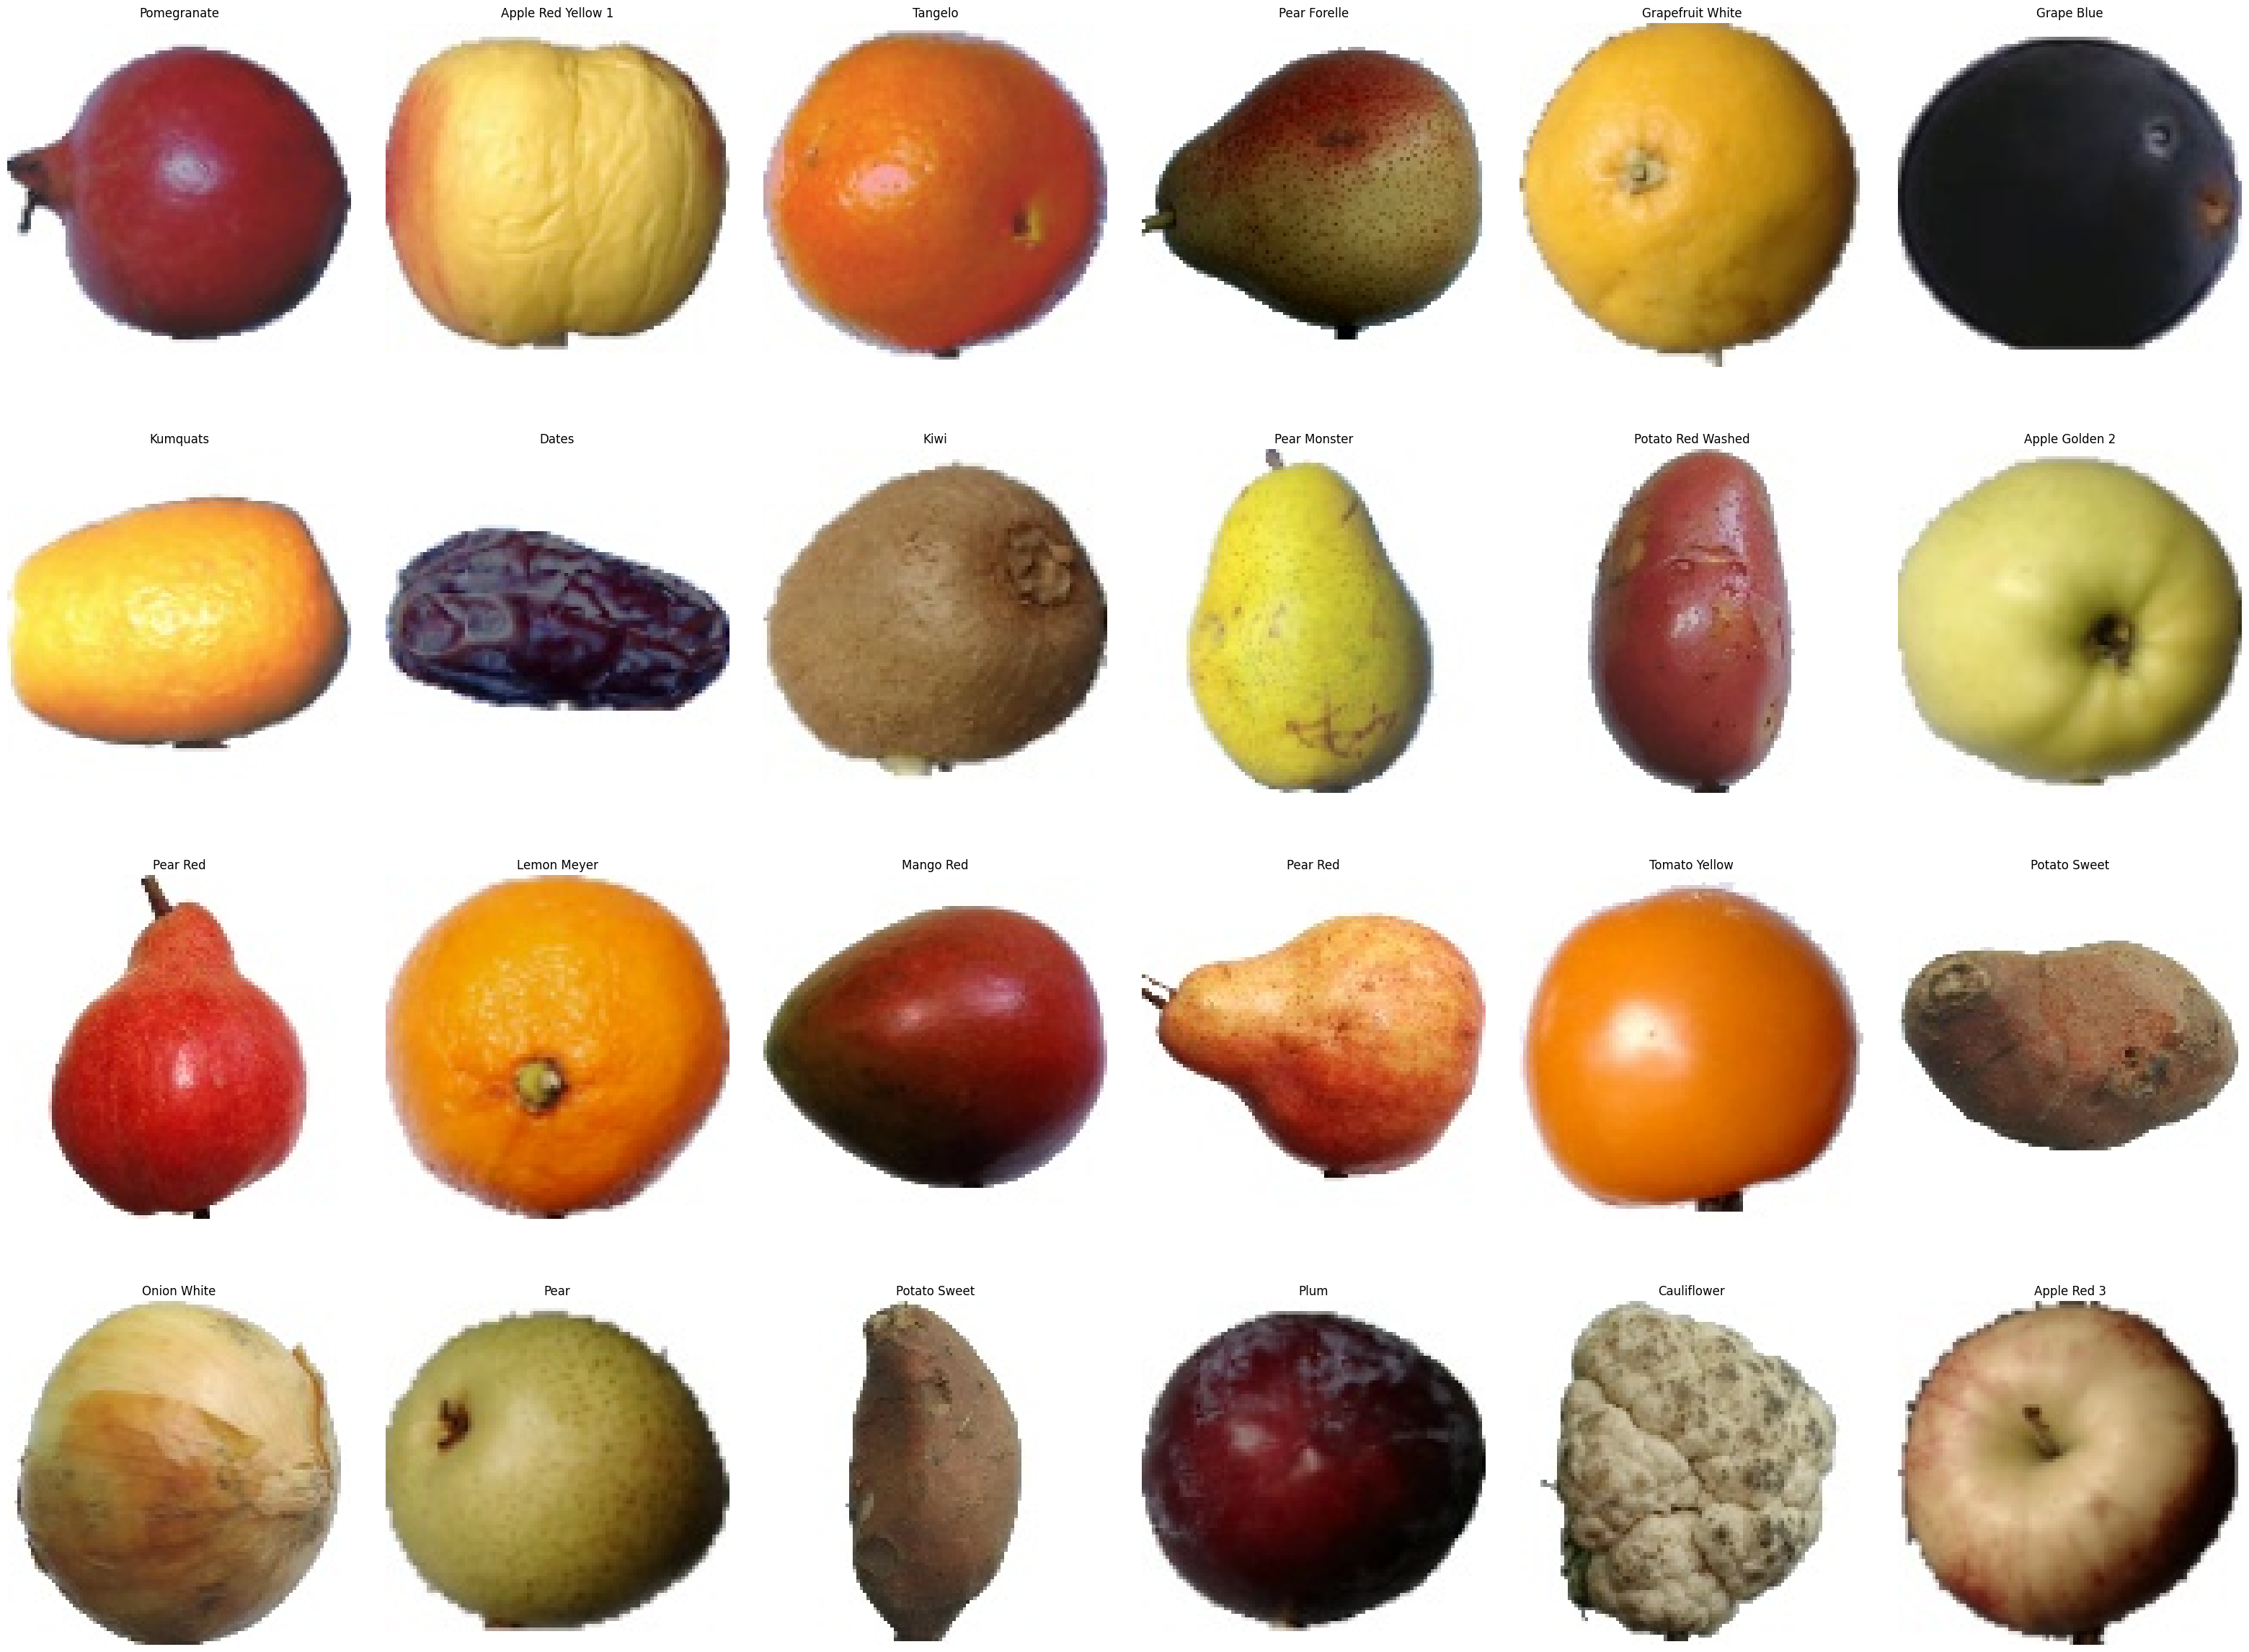

In [22]:
plt.figure(figsize=(40,30))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder = np.random.randint(0, len(os.listdir(image_path)))
    random_folder_path = os.path.join(image_path, os.listdir(image_path)[random_folder])
    random_image = np.random.randint(0, len(os.listdir(random_folder_path)))
    random_image_path = os.path.join(random_folder_path, os.listdir(random_folder_path)[random_image])
    image = cv2.imread(random_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get the class name for the current image
    class_name = class_names[random_folder]

    plt.subplot(4, 6, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(class_name)

plt.show()

In [25]:
print("Number of classes : {}".format(len(class_names)))

Number of classes : 131


In [28]:
numberof_images={}
for class_name in class_names:
    numberof_images[class_name]=len(os.listdir(image_path+"/"+class_name))
images_each_class=pd.DataFrame(numberof_images.values(),index=numberof_images.keys(),columns=["Number of images"])
images_each_class

,Number of images
Quince,490
Grapefruit White,492
Granadilla,490
Orange,479
Apple Red 3,429
...,...
Kohlrabi,471
Pepper Green,444
Watermelon,475
Mango,490


# Distrubution of Fruits with counts in Training Set

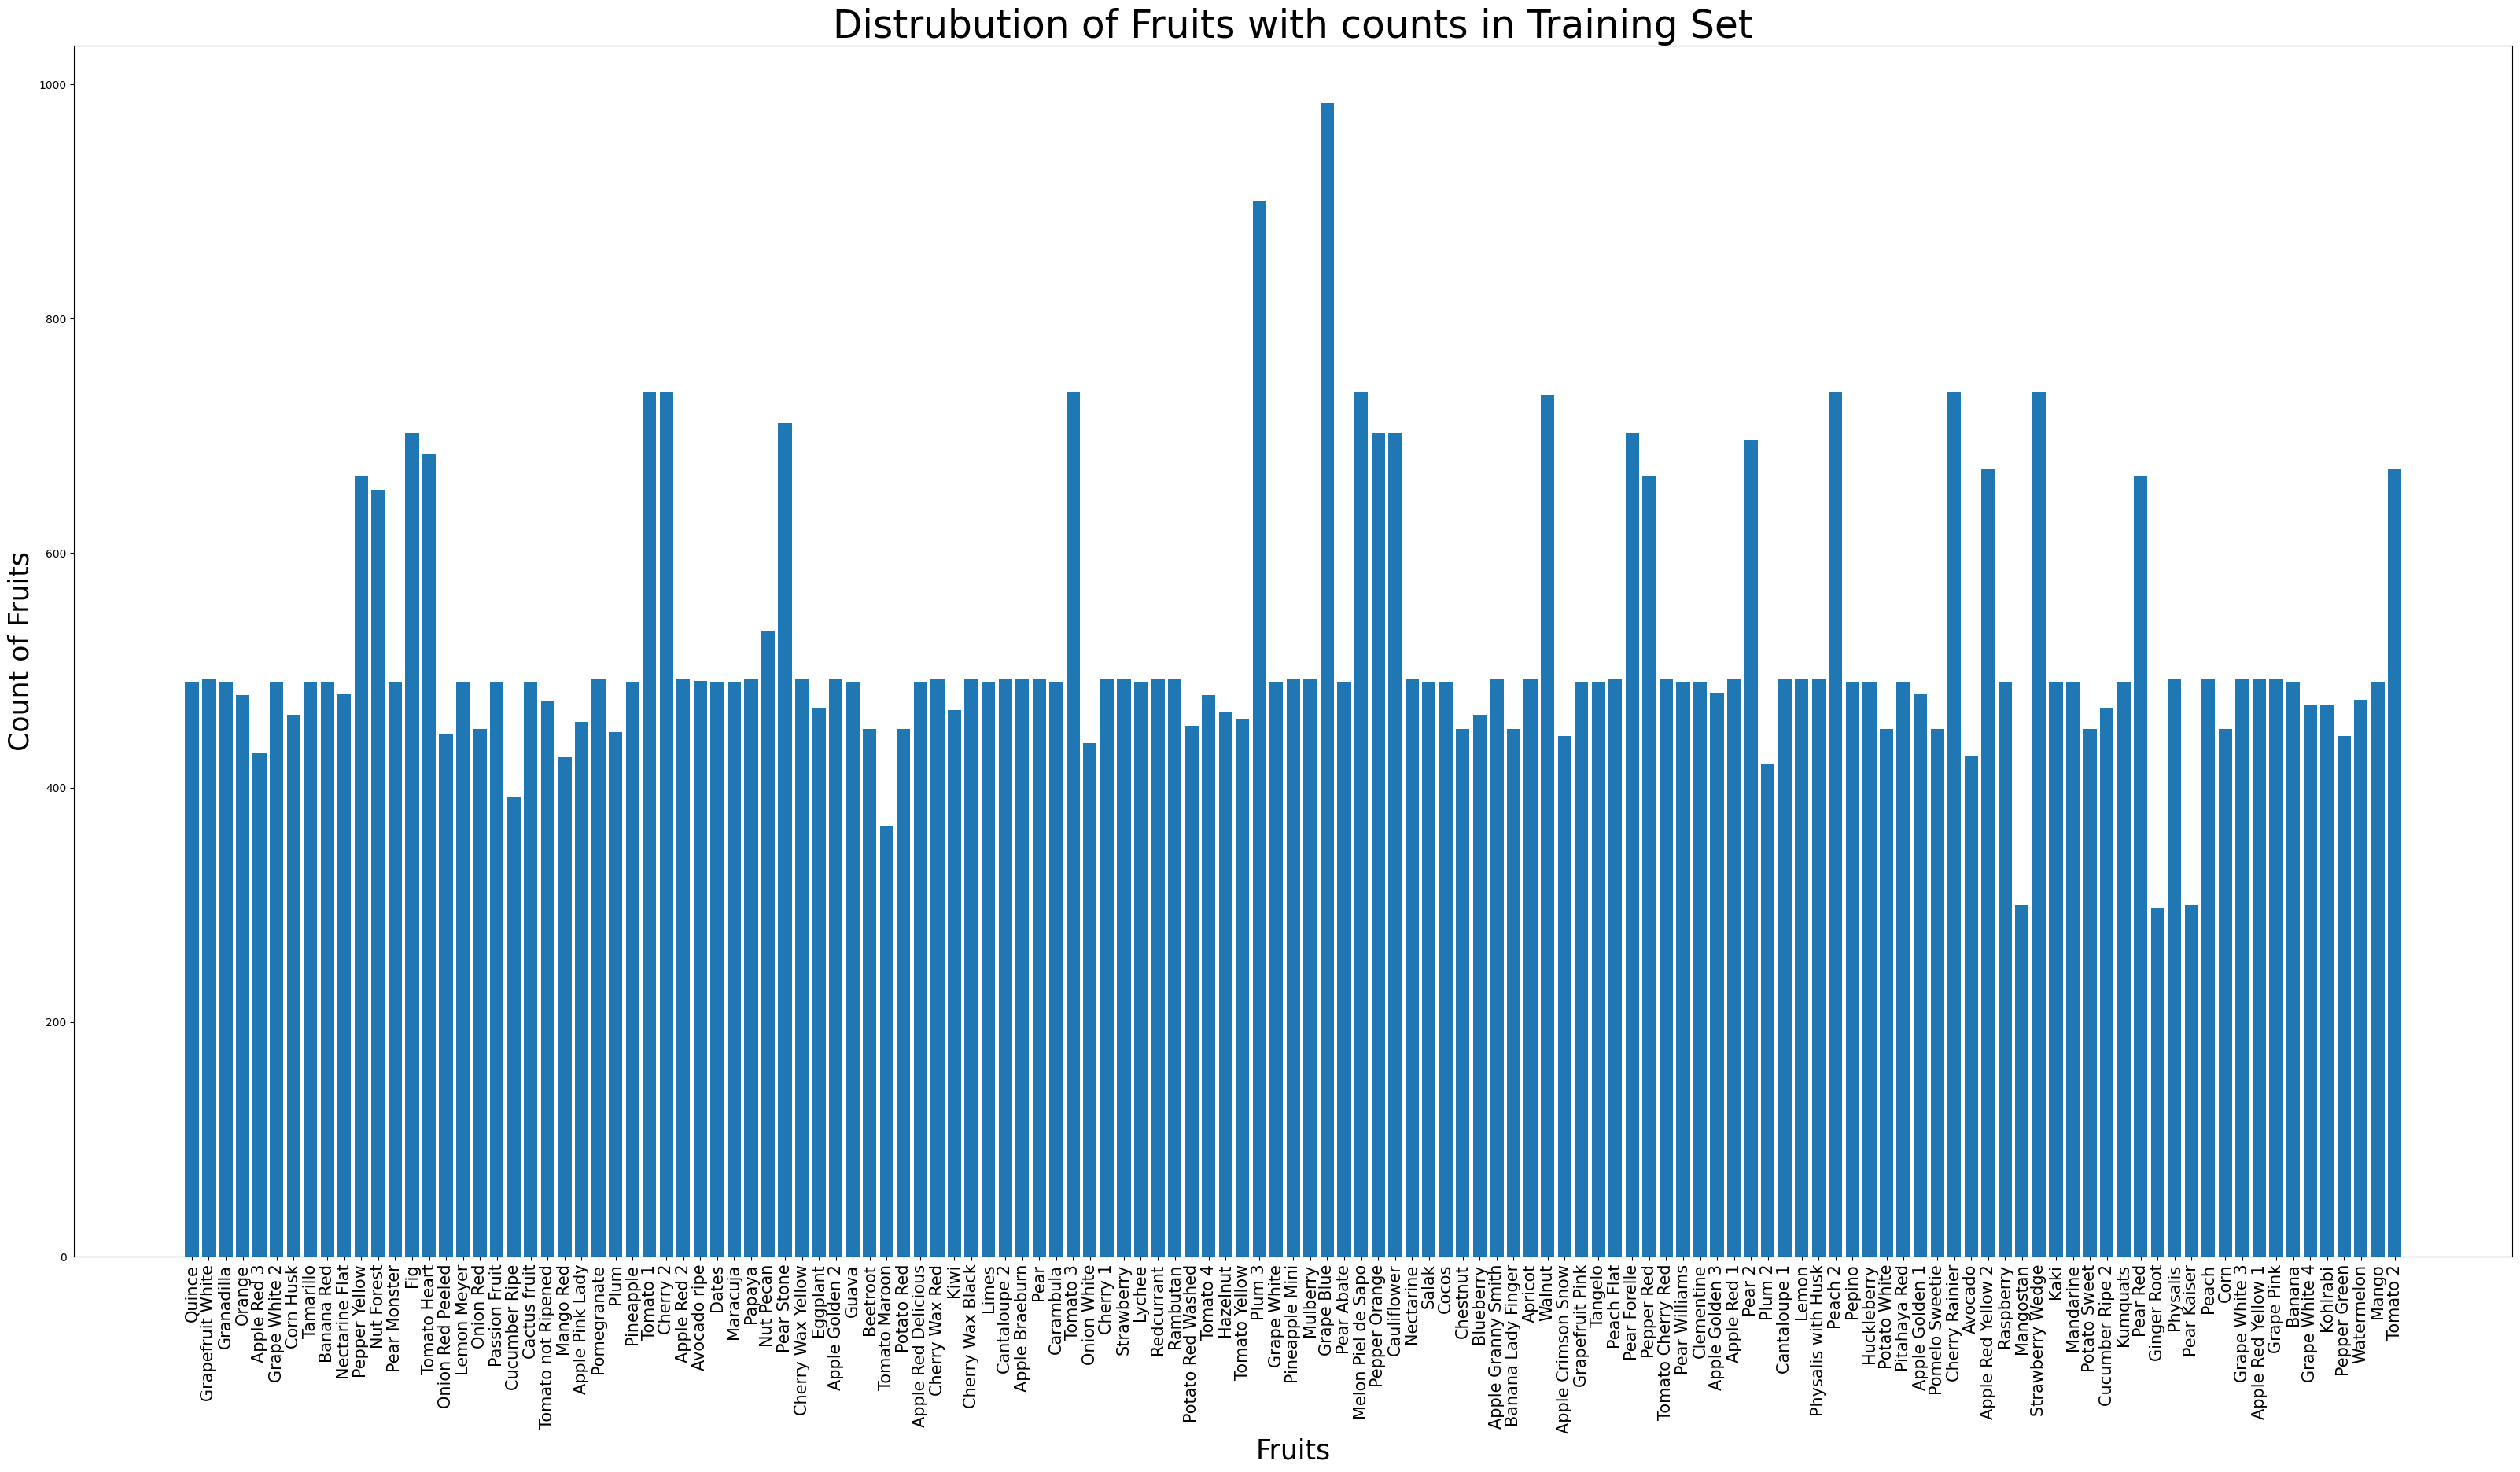

In [23]:
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(train_categories))
plt.bar(index, train_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Training Set', fontsize=35)
plt.show()

# Distrubution of Fruits with counts in Training Set

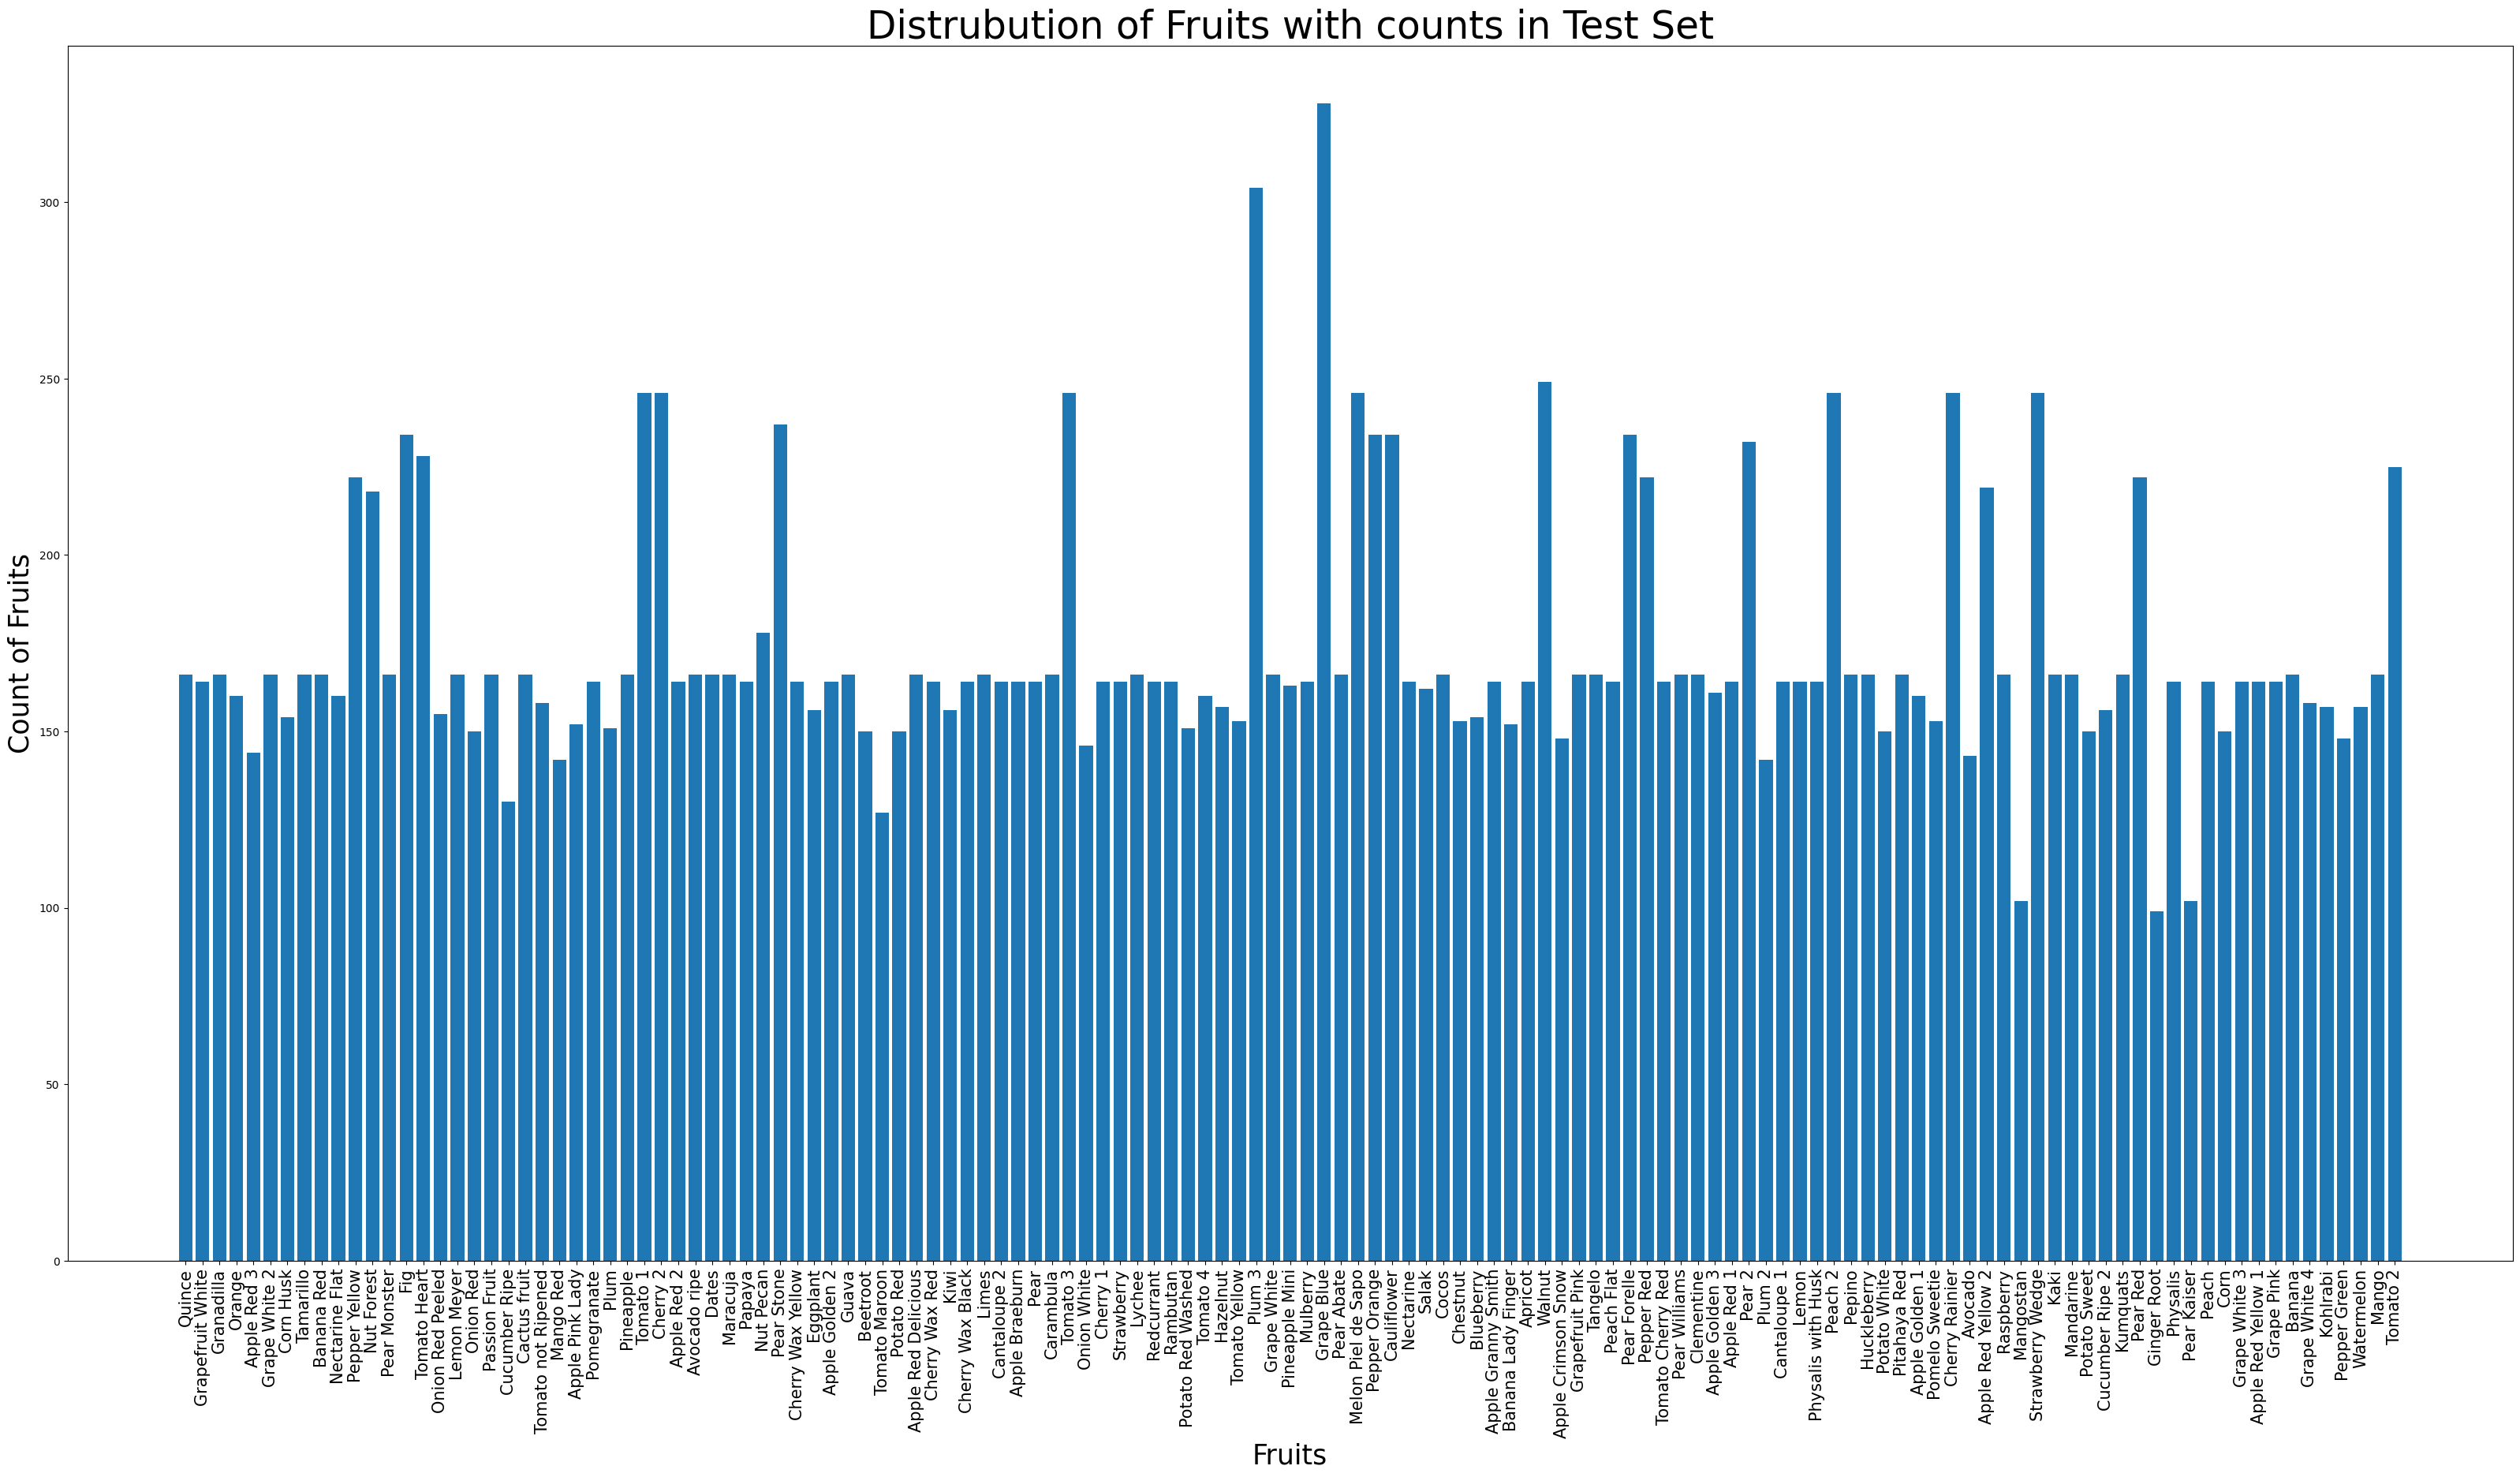

In [24]:
index2 = np.arange(len(test_categories))
plt.bar(index2, test_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index2, test_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Test Set', fontsize=35)
plt.show()